# Task 1 

In [1]:
# This function should work for infinite number of qubits as well because we are turning them into a binary number 
# Therefore, we would have less number of qubits than the required infinite number of qubits .. 
# Improvement to make: I was not able to consider the negataive value at the end ... 

In [2]:
import pennylane as qml
import pennylane.numpy as np
import numpy as np

In [3]:
# This function finds the bigger number of qubits compared to each numbers 
def find_numQubits(number_1, number_2):
    num_qubit = 0
    num1_bit = number_1.bit_length()
    num2_bit = number_2.bit_length()
    
    if num1_bit > num2_bit :
        num_qubit = num1_bit
    elif num2_bit > num1_bit: 
        num_qubit = num2_bit
    else :
        num_qubit = num1_bit
    return num_qubit

In [4]:
# This function turns decimal numbers into binary numbers and returns binary numbers only with numbers 
def binary(number_1, number_2): 
    bin_num1 = bin(number_1)
    bin_num2 = bin(number_2)
    qubit_num1 ='{:0b}'.format(number_1)
    qubit_num2 = '{:0b}'.format(number_2)
    
    if (number_1<0):
        qubit_num1 = qubit_num1[1:]
    if (number_2<0):
        qubit_num2 = qubit_num2[1:]
    return qubit_num1, qubit_num2

In [5]:
# This function prints the number_1's circuit 
def circuit1(number_1, number_2): 
    num_qubit = find_numQubits(number_1, number_2)
    qubit_num1,qubit_num2 = binary(number_1, number_2)
    
    dev = qml.device("default.qubit", wires=num_qubit)
    @qml.qnode(dev)
    def circuit1(dev, qubit_num1):
        for i in range(0, len(qubit_num1)):
            r_qubit_num1 = qubit_num1[::-1]
            dict_num = {r_qubit_num1[i]:i}
            if (r_qubit_num1[i] == '1'): 
                qml.PauliX(wires=i)
        return [qml.expval(qml.PauliZ(i)) for i in range(len(qubit_num1))]
    return qml.draw_mpl(circuit1)(dev, qubit_num1)


In [6]:
def circuit2(number_1, number_2): 
    num_qubit = find_numQubits(number_1, number_2)
    qubit_num1,qubit_num2 = binary(number_1, number_2)

    dev = qml.device("default.qubit", wires=num_qubit, shots = 1000)
    @qml.qnode(dev)
    def circuit2(dev,qubit_num2): 
        for i in range(0, len(qubit_num2)):
            r_qubit_num2 = qubit_num2[::-1]
            dict_num = {r_qubit_num2[i]:i}
            if (r_qubit_num2[i] == '1'): 
                qml.PauliX(wires=i)
        return [qml.expval(qml.PauliZ(i)) for i in range(len(qubit_num2))]
    return qml.draw_mpl(circuit2)(dev, qubit_num2)

In [7]:
def find_the_largest_number (number_1, number_2):
    """
    number_1 : integer value that is the first parameter to the function,
    number_2 : integer value that is the second parameter to the function.
    return the largest number between number_1 and number_2
    """
     # use a framework that works with quantum circuits, qiskit, cirq, pennylane, etc. 
     # consider print your quantum circuit,
    
    num_qubit = find_numQubits(number_1, number_2)
    qubit_num1,qubit_num2 = binary(number_1, number_2)
    circuit1(number_1, number_2)
    circuit2(number_1, number_2)
    
    bin_lists = [qubit_num1, qubit_num2]
    bin_lists_signs = [bin(number_1), bin(number_2)]
    num_list = [number_1, number_2]
    
    def find_maxi(bin_lists): 
        total_lists = []
        for each_nums in bin_lists: 
            r_each_nums = each_nums[::-1]
            total = 0 
            maxi =0
            for i in range(0,len(r_each_nums)): 
                dict_num = {r_each_nums[i]:i}
                if (r_each_nums[i] == '1'): 
                    total += np.power(2,i)
                    maxi = max(total, maxi)
            total_lists.append(maxi)
        return total_lists
        
    def comp(bin_lists, number_1, number_2): 
        maxi = find_maxi(bin_lists)
        for i in range(len(maxi)):
            if maxi[i] > maxi[i+1] : 
                return maxi[i]
            else: 
                return maxi[i+1]
    
    print("The larger value is :", comp(bin_lists, number_1, number_2))
    comp(bin_lists, number_1, number_2)

The larger value is : 10


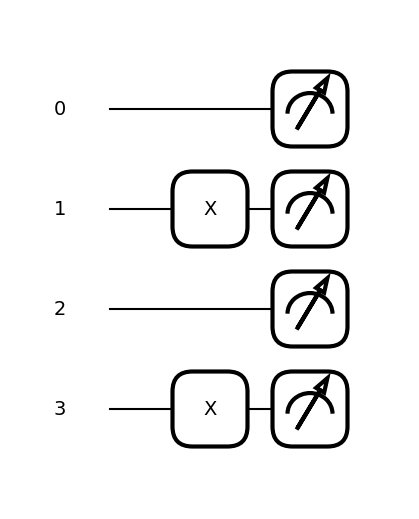

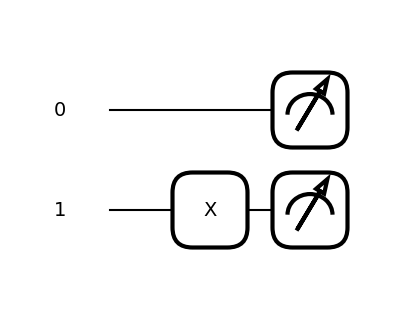

In [8]:
A = find_the_largest_number(10,2)

The larger value is : 30


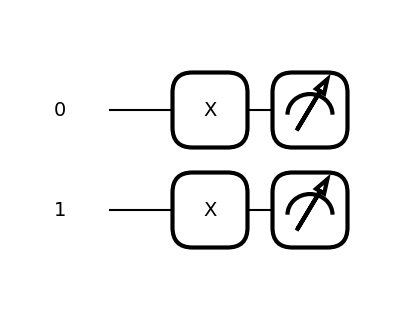

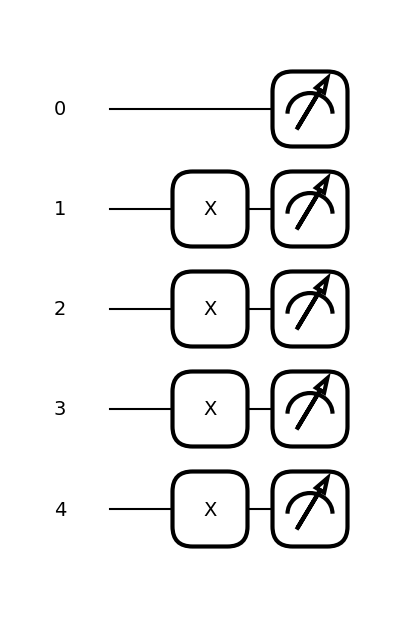

In [9]:
B = find_the_largest_number(3, 30)

The larger value is : 1001


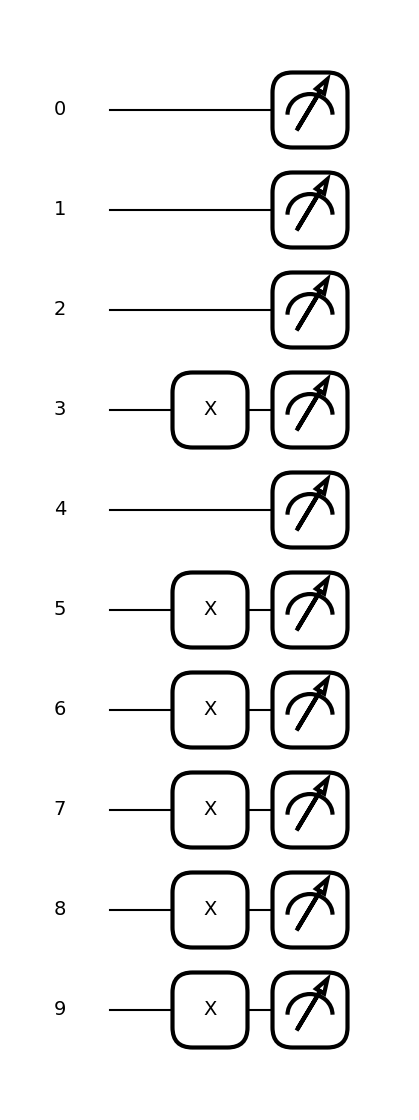

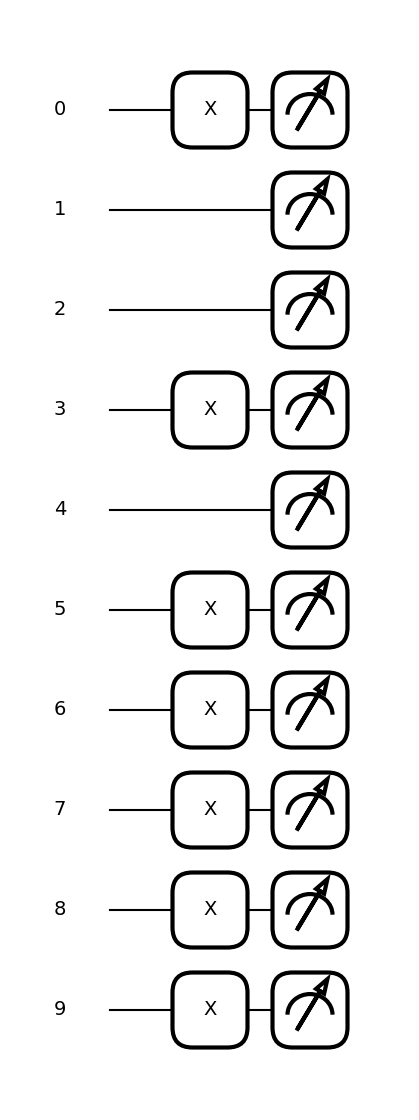

In [10]:
D = find_the_largest_number(1000, 1001)